# Data: Plot Daily, Wet State Precipitation Depth

There are two data sets

1. PRISM
2. LOCA

Plot the daily wet state depths by month in a violin plot as a way of comparing among the analysis intervals.

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
from copy import deepcopy

In [3]:
IN_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Process_Events'
PRISM_XLSX = "PRISM_AnnMaxSummary.xlsx"
IN_SHT = "Pandas_Out"
LOCA_DP_ANN_STR = "Annual_M%d_1981-2010.pickle"
LOCA_DP_MON_STR = "Daily_M%d_1981-2010.pickle"
LOCA_P1_MON_STR = "Daily_M%d_2011-2040.pickle"
LOCA_P2_MON_STR = "Daily_M%d_2041-2070.pickle"
LOCA_P3_MON_STR = "Daily_M%d_2071-2100.pickle"
NUM_MODEL = 64
PRE_THRESH = 0.2   # threshold in mm

In [4]:
OUT_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Events'

## Import PRISM

PRISM is in a spreadsheet so load the spreadsheet and then process our values

In [5]:
InFile = os.path.normpath( os.path.join( IN_DIR, PRISM_XLSX ) )
PriIn = pd.read_excel( InFile, sheet_name=IN_SHT, header=0, index_col=0, parse_dates=True )

In [6]:
display( HTML( PriIn.head().to_html() ))

,Year,Month,Day of Year,WS_Val_mm,Daily_Max
Date,,,,,
1981-01-01,1981,1,1,0.0,0.0
1981-01-02,1981,1,2,0.0,0.0
1981-01-03,1981,1,3,0.0,0.0
1981-01-04,1981,1,4,0.0,0.0
1981-01-05,1981,1,5,0.0,0.0


In [7]:
len( PriIn )

10957

In [8]:
PrecipDays = PriIn[PriIn["WS_Val_mm"] > PRE_THRESH].copy()
len(PrecipDays)

2299

In [9]:
display( HTML( PrecipDays.describe().to_html() ) )

,Year,Month,Day of Year,WS_Val_mm,Daily_Max
count,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,1995.578512,6.464550,181.501087,6.911839,11.968260
std,8.630773,3.164057,96.563603,9.797459,15.775449
min,1981.000000,1.000000,1.000000,0.200890,0.340000
25%,1988.000000,4.000000,107.000000,0.951464,2.640000
50%,1996.000000,6.000000,180.000000,3.104151,6.550000
75%,2003.000000,9.000000,258.000000,8.596459,15.270000
max,2010.000000,12.000000,366.000000,85.451761,200.690002


Make a dictionary with all of the wet day precipitation depths for each month

In [10]:
PriMonDict = dict()

In [11]:
for iI in range(1, 13, 1):
    cMonDF = PrecipDays[PrecipDays["Month"] == iI].copy()
    print("Month %d: count %d" % ( iI, len(cMonDF) ) )
    PriMonDict[iI] = cMonDF["WS_Val_mm"].to_numpy()
# end for

Month 1: count 160
Month 2: count 150
Month 3: count 190
Month 4: count 168
Month 5: count 252
Month 6: count 242
Month 7: count 207
Month 8: count 234
Month 9: count 218
Month 10: count 218
Month 11: count 135
Month 12: count 125


Output to a pickle file in case we want to use this building block later

In [12]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "PRISM_DP_WetDayDepthArray_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( PriMonDict, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

## Import and Process All LOCA Models

In [13]:
iI = 1
cMonName = LOCA_DP_MON_STR % iI
cMonName

'Daily_M1_1981-2010.pickle'

In [14]:
InPickle = os.path.normpath( os.path.join( IN_DIR, cMonName ) )
with open( InPickle, 'rb' ) as IP:
    cLADF = pickle.load( IP )
# end with

In [15]:
display( HTML( cLADF.head().to_html() ) )

,62,63,64,76,77,78,79,90,91,92,93,94,104,105,106,107,108,120,121,122,123,137,Daily_Max,WS_Val_mm
Datetime_UTC,,,,,,,,,,,,,,,,,,,,,,,,
1981-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1981-01-02,2.072875,2.063946,1.873212,2.066427,2.073647,2.015675,1.393533,2.109797,1.838564,1.697193,1.507596,1.319757,1.889094,1.850045,1.752164,1.596073,1.426943,1.726457,1.596627,1.445976,1.265765,0.900578,2.109797,1.790644
1981-01-03,0.436147,0.386095,0.295075,0.245621,0.255545,0.241478,0.201374,0.081465,0.108685,0.132270,0.108759,0.115259,0.104092,0.116607,0.120240,0.120527,0.110340,0.147029,0.136868,0.120476,0.152028,0.192651,0.436147,0.170519
1981-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1981-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
ExHeader = "WS_Val_mm"

In [17]:
cDailyWS = cLADF[[ExHeader]].copy()

In [18]:
display( HTML( cDailyWS.head().to_html() ) )

,WS_Val_mm
Datetime_UTC,
1981-01-01,0.000000
1981-01-02,1.790644
1981-01-03,0.170519
1981-01-04,0.000000
1981-01-05,0.000000


Get only the wet days that meet our threshold

In [19]:
cModPreDays = cDailyWS[cDailyWS[ExHeader] > PRE_THRESH].copy()
len(cModPreDays)

3223

In [20]:
cModPreDays["Month"] = cModPreDays.index.month

In [21]:
display( HTML( cModPreDays.describe().to_html() ) )

,WS_Val_mm,Month
count,3223.000000,3223.000000
mean,4.768332,6.619299
std,6.847946,3.209230
min,0.201651,1.000000
25%,0.781538,4.000000
50%,2.239858,6.000000
75%,5.860606,9.000000
max,76.616649,12.000000


In [22]:
display( HTML( cModPreDays.tail().to_html() ) )

,WS_Val_mm,Month
Datetime_UTC,,
2010-12-08,0.269057,12
2010-12-09,1.152824,12
2010-12-10,1.878105,12
2010-12-27,0.580138,12
2010-12-28,0.522965,12


### Data Period

In [23]:
LDP_Mon_CDict = dict()

In [24]:
iCnt = 0
for iI in range( NUM_MODEL ):
    cMonName = LOCA_DP_MON_STR % ( iI + 1 )
    InPickle = os.path.normpath( os.path.join( IN_DIR, cMonName ) )
    with open( InPickle, 'rb' ) as IP:
        cLADF = pickle.load( IP )
    # end with
    cDailyWS = cLADF[[ExHeader]].copy()
    cModPreDays = cDailyWS[cDailyWS[ExHeader] > PRE_THRESH].copy()
    cModPreDays["Month"] = cModPreDays.index.month
    for jJ in range(1, 13, 1):
        cDF = cModPreDays[cModPreDays["Month"] == jJ].copy()
        npMAr = cDF[ExHeader].to_numpy()
        if iCnt == 0:
            LDP_Mon_CDict[jJ] = [ npMAr ]
        else:
            LDP_Mon_CDict[jJ].append( npMAr )
        # end if
    # end inner for
    iCnt += 1
# end for

In [25]:
LOCA_DP = dict()
for jJ in range(1, 13, 1):
    npMAr = np.concatenate( LDP_Mon_CDict[jJ], axis=0 )
    LOCA_DP[jJ] = npMAr
# end for

In [26]:
del LDP_Mon_CDict

In [27]:
len( LOCA_DP )

12

Output to a pickle file in case we want to use this building block later

In [28]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_DP_WetDayDepthArray_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( LOCA_DP, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

### Project Period 1

In [29]:
LP1_Mon_CDict = dict()

In [30]:
iCnt = 0
for iI in range( NUM_MODEL ):
    cMonName = LOCA_P1_MON_STR % ( iI + 1 )
    InPickle = os.path.normpath( os.path.join( IN_DIR, cMonName ) )
    with open( InPickle, 'rb' ) as IP:
        cLADF = pickle.load( IP )
    # end with
    cDailyWS = cLADF[[ExHeader]].copy()
    cModPreDays = cDailyWS[cDailyWS[ExHeader] > PRE_THRESH].copy()
    cModPreDays["Month"] = cModPreDays.index.month
    for jJ in range(1, 13, 1):
        cDF = cModPreDays[cModPreDays["Month"] == jJ].copy()
        npMAr = cDF[ExHeader].to_numpy()
        if iCnt == 0:
            LP1_Mon_CDict[jJ] = [ npMAr ]
        else:
            LP1_Mon_CDict[jJ].append( npMAr )
        # end if
    # end inner for
    iCnt += 1
# end for

In [31]:
LOCA_P1 = dict()
for jJ in range(1, 13, 1):
    npMAr = np.concatenate( LP1_Mon_CDict[jJ], axis=0 )
    LOCA_P1[jJ] = npMAr
# end for

In [32]:
del LP1_Mon_CDict

In [33]:
len( LOCA_P1 )

12

Output to a pickle file in case we want to use this building block later

In [34]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_P1_WetDayDepthArray_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( LOCA_P1, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

### Project Period 2

In [35]:
LP2_Mon_CDict = dict()

In [36]:
iCnt = 0
for iI in range( NUM_MODEL ):
    cMonName = LOCA_P2_MON_STR % ( iI + 1 )
    InPickle = os.path.normpath( os.path.join( IN_DIR, cMonName ) )
    with open( InPickle, 'rb' ) as IP:
        cLADF = pickle.load( IP )
    # end with
    cDailyWS = cLADF[[ExHeader]].copy()
    cModPreDays = cDailyWS[cDailyWS[ExHeader] > PRE_THRESH].copy()
    cModPreDays["Month"] = cModPreDays.index.month
    for jJ in range(1, 13, 1):
        cDF = cModPreDays[cModPreDays["Month"] == jJ].copy()
        npMAr = cDF[ExHeader].to_numpy()
        if iCnt == 0:
            LP2_Mon_CDict[jJ] = [ npMAr ]
        else:
            LP2_Mon_CDict[jJ].append( npMAr )
        # end if
    # end inner for
    iCnt += 1
# end for

In [37]:
LOCA_P2 = dict()
for jJ in range(1, 13, 1):
    npMAr = np.concatenate( LP2_Mon_CDict[jJ], axis=0 )
    LOCA_P2[jJ] = npMAr
# end for

In [38]:
del LP2_Mon_CDict

In [39]:
len( LOCA_P2 )

12

Output to a pickle file in case we want to use this building block later

In [40]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_P2_WetDayDepthArray_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( LOCA_P2, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

### Project Period 3

In [41]:
LP3_Mon_CDict = dict()

In [42]:
iCnt = 0
for iI in range( NUM_MODEL ):
    cMonName = LOCA_P3_MON_STR % ( iI + 1 )
    InPickle = os.path.normpath( os.path.join( IN_DIR, cMonName ) )
    with open( InPickle, 'rb' ) as IP:
        cLADF = pickle.load( IP )
    # end with
    cDailyWS = cLADF[[ExHeader]].copy()
    cModPreDays = cDailyWS[cDailyWS[ExHeader] > PRE_THRESH].copy()
    cModPreDays["Month"] = cModPreDays.index.month
    for jJ in range(1, 13, 1):
        cDF = cModPreDays[cModPreDays["Month"] == jJ].copy()
        npMAr = cDF[ExHeader].to_numpy()
        if iCnt == 0:
            LP3_Mon_CDict[jJ] = [ npMAr ]
        else:
            LP3_Mon_CDict[jJ].append( npMAr )
        # end if
    # end inner for
    iCnt += 1
# end for

In [43]:
LOCA_P3 = dict()
for jJ in range(1, 13, 1):
    npMAr = np.concatenate( LP3_Mon_CDict[jJ], axis=0 )
    LOCA_P3[jJ] = npMAr
# end for

In [44]:
del LP3_Mon_CDict

In [45]:
len( LOCA_P3 )

12

Output to a pickle file in case we want to use this building block later

In [46]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_P3_WetDayDepthArray_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( LOCA_P3, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

## Plots

All plots are split violin plots with PRISM on the left compared to the LOCA on the right. This means that there are four total plots

1. PRISM, 1981-2010 - LOCA Data Period, 1981-2010
2. PRISM, 1981-2010 - LOCA Projection Period 1, 2011-2040
3. PRISM, 1981-2010 - LOCA Projection Period 2, 2041-2070
4. PRISM, 1981-2010 - LOCA Projection Period 3, 2071-2100

In [47]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

### PRISM - LOCA Data Period

#### Make DataFrame for Split Violin

In [48]:
PrismLabel = "PRISM 1981-2010"
LocaLabel = "LOCA 1981-2010"

In [49]:
MonthLabels = list()
DSetLabels = list()

Go through one month at at time and build our arrays

In [50]:
for jJ in range( 1, 13, 1):
    PriAr = PriMonDict[jJ]
    NumPRISM = PriAr.shape[0]
    LocaAr = LOCA_DP[jJ]
    NumLOCA = LocaAr.shape[0]
    PRISM_Labels = [ PrismLabel for x in range( NumPRISM ) ]
    LOCA_Labels = [ LocaLabel for x in range( NumLOCA ) ]
    AllLabels = deepcopy( PRISM_Labels )
    AllLabels.extend( LOCA_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumPRISM + NumLOCA ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ PriAr, LocaAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, PriAr, LocaAr ], axis=0 )
    # end if

In [51]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "AllDays" : AllValues, }
DPDF = pd.DataFrame( data=DataDict )

In [52]:
display( HTML( DPDF.head().to_html() ) )

,DLabel,Month,AllDays
0,PRISM 1981-2010,Jan,0.578576
1,PRISM 1981-2010,Jan,2.802669
2,PRISM 1981-2010,Jan,0.245620
3,PRISM 1981-2010,Jan,1.988237
4,PRISM 1981-2010,Jan,4.407552


In [53]:
display( HTML( DPDF.describe().to_html() ) )

,AllDays
count,205003.000000
mean,4.728842
std,6.899965
min,0.200029
25%,0.762694
50%,2.169303
75%,5.874358
max,113.170851


Output to a pickle file in case need to revist

In [54]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_WetDayDepth_1981-2010.pickle" ) )
DPDF.to_pickle( OutFiler, compression='zip', protocol=-1 )

#### Plot

In [55]:
#preTicks = [ 0.0 + (x *25.0) for x in range(7) ]
preTicks = [ 1.0, 10.0, 100.0, 200.0 ]

In [56]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_1981-2010.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_1981-2010.svg'

In [57]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_1981-2010.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_1981-2010.png'

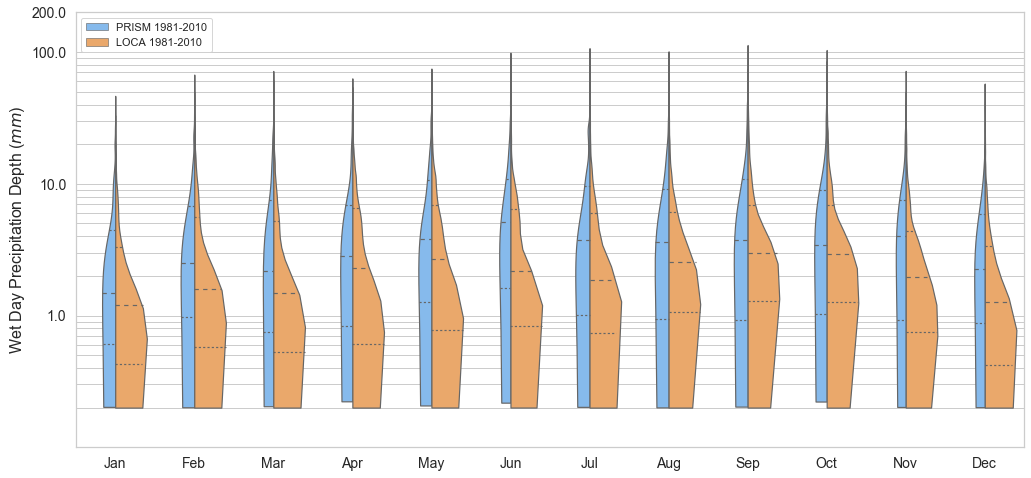

In [58]:
Fig1 = plt.figure()
Fig1.set_size_inches(17.0, 8.0)
ax11 = Fig1.add_subplot(111)
g = sns.violinplot( x="Month", y="AllDays", hue="DLabel", split=True,
                inner="quart", cut=0, linewidth=1.2,
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=DPDF, ax=ax11, legend_out=True )
g.legend(prop=dict(size=14))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=16 )
g.set_ylabel('Wet Day Precipitation Depth ($mm$)', fontsize=16)
g.set_ylim( ( 0.1, 200.0))
g.tick_params(axis='both', which='major', labelsize=14)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

#### Box and Whisker

In [59]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_BW_1981-2010.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_BW_1981-2010.svg'

In [60]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_BW_1981-2010.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_BW_1981-2010.png'

In [61]:
#preTicks = [ 0.0 + (x *25.0) for x in range(7) ]
preTicks = [ 1.0, 10.0, 100.0, 200.0 ]

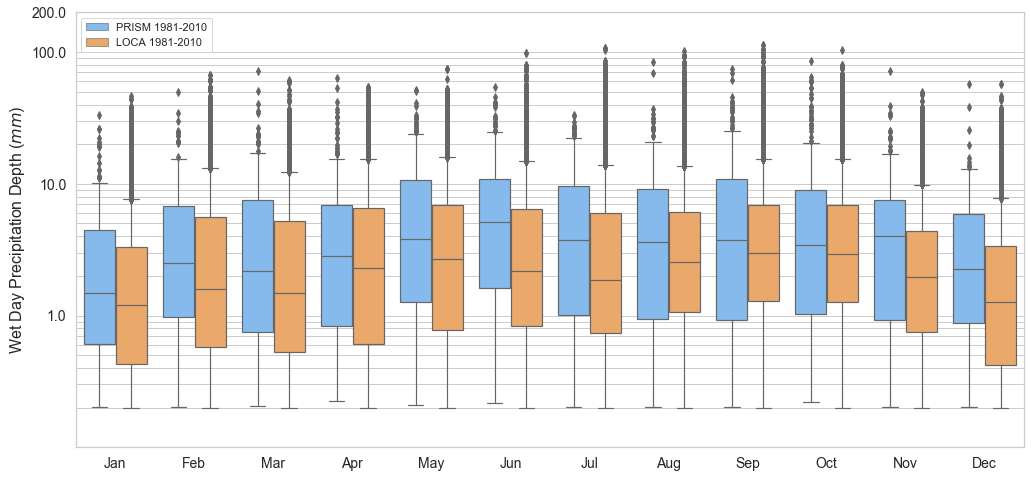

In [62]:
Fig1 = plt.figure()
Fig1.set_size_inches(17.0, 8.0)
ax11 = Fig1.add_subplot(111)
g = sns.boxplot( x="Month", y="AllDays", hue="DLabel",
                 dodge=True, linewidth=1.2, orient="v",
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=DPDF, ax=ax11 )
g.legend(prop=dict(size=14))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=16 )
g.set_ylabel('Wet Day Precipitation Depth ($mm$)', fontsize=16)
g.set_ylim( ( 0.1, 200.0))
g.tick_params(axis='both', which='major', labelsize=14)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

#### Boxen

In [63]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_BXN_1981-2010.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_BXN_1981-2010.svg'

In [64]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_BXN_1981-2010.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_BXN_1981-2010.png'

In [65]:
#preTicks = [ 0.0 + (x *25.0) for x in range(7) ]
preTicks = [ 1.0, 10.0, 100.0, 200.0 ]

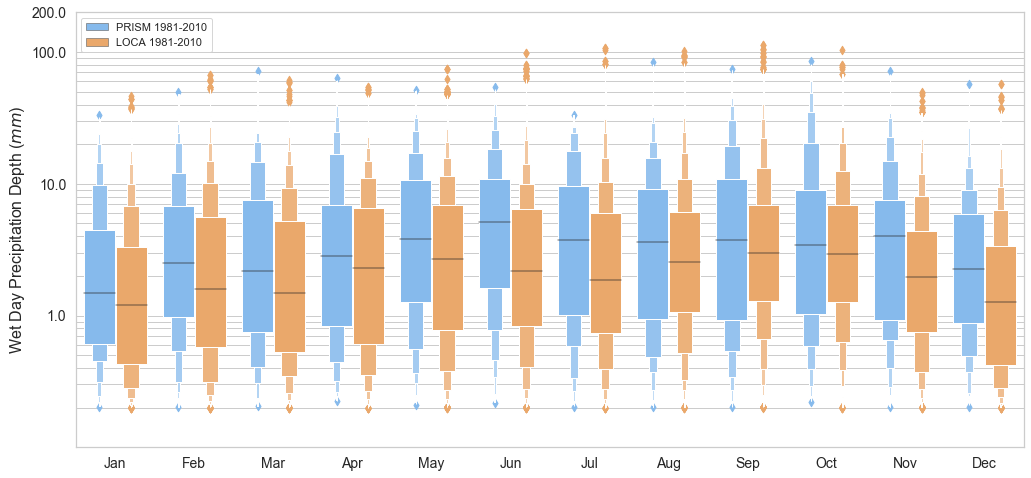

In [66]:
Fig1 = plt.figure()
Fig1.set_size_inches(17.0, 8.0)
ax11 = Fig1.add_subplot(111)
g = sns.boxenplot( x="Month", y="AllDays", hue="DLabel",
                   dodge=True, linewidth=1.2, orient="v",
                   palette={ PrismLabel : "xkcd:sky blue", 
                             LocaLabel : "xkcd:pale orange" },
                   data=DPDF, ax=ax11 )
g.legend(prop=dict(size=14))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=16 )
g.set_ylabel('Wet Day Precipitation Depth ($mm$)', fontsize=16)
g.set_ylim( ( 0.1, 200.0))
g.tick_params(axis='both', which='major', labelsize=14)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### PRISM - LOCA Projection Period 1

#### Make DataFrame for Split Violin

In [67]:
PrismLabel = "PRISM 1981-2010"
LocaLabel = "LOCA 2011-2040"

In [68]:
MonthLabels = list()
DSetLabels = list()

Go through one month at at time and build our arrays

In [69]:
for jJ in range( 1, 13, 1):
    PriAr = PriMonDict[jJ]
    NumPRISM = PriAr.shape[0]
    LocaAr = LOCA_P1[jJ]
    NumLOCA = LocaAr.shape[0]
    PRISM_Labels = [ PrismLabel for x in range( NumPRISM ) ]
    LOCA_Labels = [ LocaLabel for x in range( NumLOCA ) ]
    AllLabels = deepcopy( PRISM_Labels )
    AllLabels.extend( LOCA_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumPRISM + NumLOCA ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ PriAr, LocaAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, PriAr, LocaAr ], axis=0 )
    # end if

In [70]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "AllDays" : AllValues, }
P1DF = pd.DataFrame( data=DataDict )

In [71]:
display( HTML( P1DF.head().to_html() ) )

,DLabel,Month,AllDays
0,PRISM 1981-2010,Jan,0.578576
1,PRISM 1981-2010,Jan,2.802669
2,PRISM 1981-2010,Jan,0.245620
3,PRISM 1981-2010,Jan,1.988237
4,PRISM 1981-2010,Jan,4.407552


In [72]:
display( HTML( P1DF.describe().to_html() ) )

,AllDays
count,196630.000000
mean,4.842342
std,7.201848
min,0.200001
25%,0.759261
50%,2.177364
75%,5.969544
max,131.548330


Output to a pickle file in case need to revist

In [73]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_WetDayDepth_2011-2040.pickle" ) )
P1DF.to_pickle( OutFiler, compression='zip', protocol=-1 )

#### Plot

In [74]:
#preTicks = [ 0.0 + (x *25.0) for x in range(7) ]
preTicks = [ 1.0, 10.0, 100.0, 200.0 ]

In [75]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_2011-2040.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_2011-2040.svg'

In [76]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_2011-2040.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_2011-2040.png'

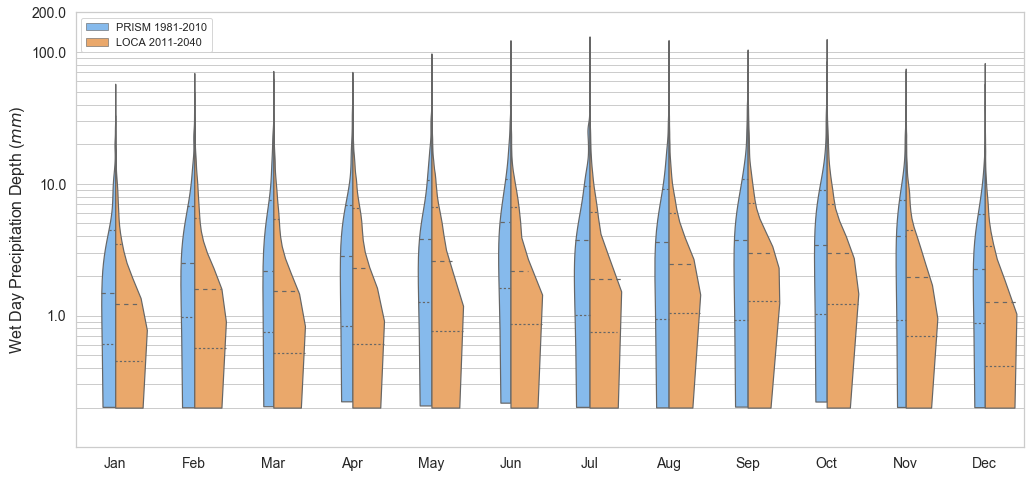

In [77]:
Fig1 = plt.figure()
Fig1.set_size_inches(17.0, 8.0)
ax11 = Fig1.add_subplot(111)
g = sns.violinplot( x="Month", y="AllDays", hue="DLabel", split=True,
                inner="quart", cut=0, linewidth=1.2,
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=P1DF, ax=ax11, legend_out=True )
g.legend(prop=dict(size=14))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=16 )
g.set_ylabel('Wet Day Precipitation Depth ($mm$)', fontsize=16)
g.set_ylim( ( 0.1, 200.0))
g.tick_params(axis='both', which='major', labelsize=14)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

#### Box and Whisker

In [78]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_BW_2011-2040.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_BW_2011-2040.svg'

In [79]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_BW_2011-2040.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_BW_2011-2040.png'

In [80]:
#preTicks = [ 0.0 + (x *25.0) for x in range(7) ]
preTicks = [ 1.0, 10.0, 100.0, 200.0 ]

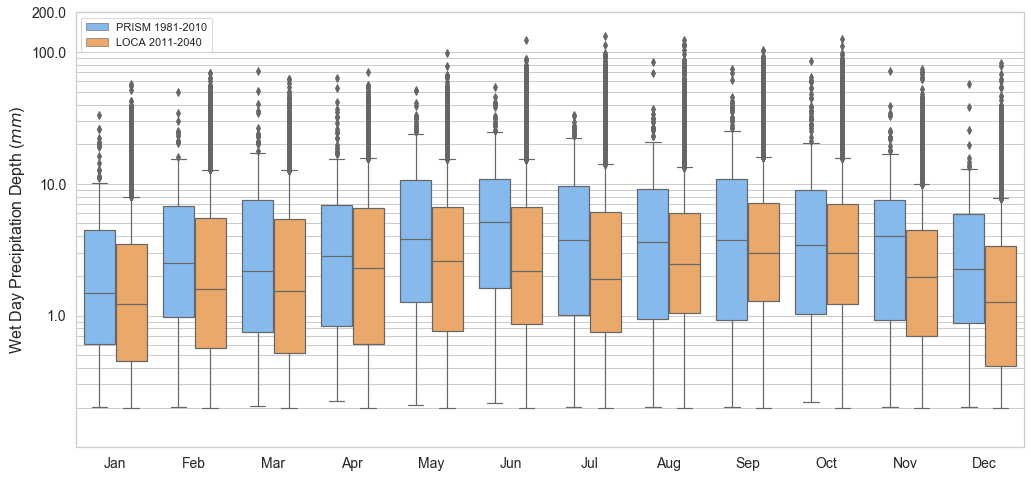

In [81]:
Fig1 = plt.figure()
Fig1.set_size_inches(17.0, 8.0)
ax11 = Fig1.add_subplot(111)
g = sns.boxplot( x="Month", y="AllDays", hue="DLabel",
                 dodge=True, linewidth=1.2, orient="v",
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=P1DF, ax=ax11 )
g.legend(prop=dict(size=14))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=16 )
g.set_ylabel('Wet Day Precipitation Depth ($mm$)', fontsize=16)
g.set_ylim( ( 0.1, 200.0))
g.tick_params(axis='both', which='major', labelsize=14)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

#### Boxen

In [82]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_BXN_2011-2040.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_BXN_2011-2040.svg'

In [83]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_BXN_2011-2040.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_BXN_2011-2040.png'

In [84]:
#preTicks = [ 0.0 + (x *25.0) for x in range(7) ]
preTicks = [ 1.0, 10.0, 100.0, 200.0 ]

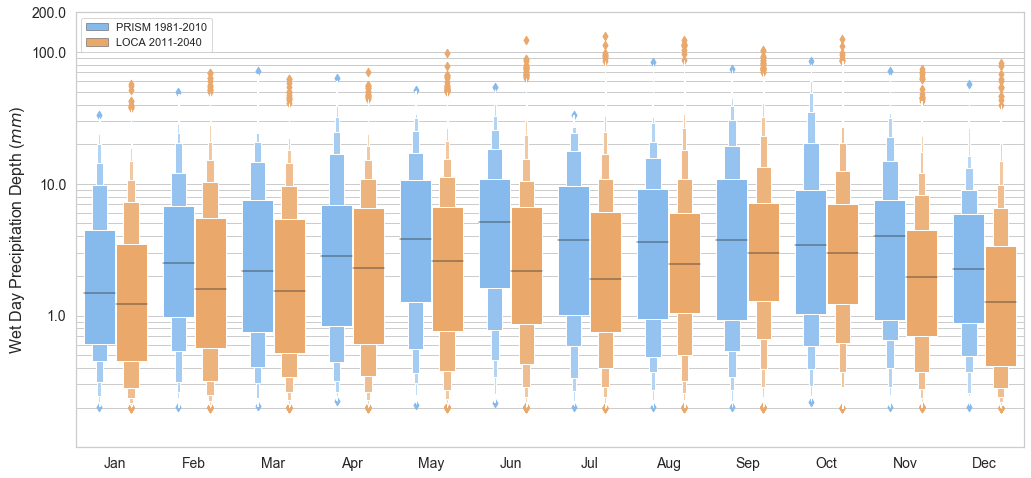

In [85]:
Fig1 = plt.figure()
Fig1.set_size_inches(17.0, 8.0)
ax11 = Fig1.add_subplot(111)
g = sns.boxenplot( x="Month", y="AllDays", hue="DLabel",
                   dodge=True, linewidth=1.2, orient="v",
                   palette={ PrismLabel : "xkcd:sky blue", 
                             LocaLabel : "xkcd:pale orange" },
                   data=P1DF, ax=ax11 )
g.legend(prop=dict(size=14))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=16 )
g.set_ylabel('Wet Day Precipitation Depth ($mm$)', fontsize=16)
g.set_ylim( ( 0.1, 200.0))
g.tick_params(axis='both', which='major', labelsize=14)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### PRISM - LOCA Projection Period 2

#### Make DataFrame for Split Violin

In [86]:
PrismLabel = "PRISM 1981-2010"
LocaLabel = "LOCA 2041-2070"

In [87]:
MonthLabels = list()
DSetLabels = list()

Go through one month at at time and build our arrays

In [88]:
for jJ in range( 1, 13, 1):
    PriAr = PriMonDict[jJ]
    NumPRISM = PriAr.shape[0]
    LocaAr = LOCA_P2[jJ]
    NumLOCA = LocaAr.shape[0]
    PRISM_Labels = [ PrismLabel for x in range( NumPRISM ) ]
    LOCA_Labels = [ LocaLabel for x in range( NumLOCA ) ]
    AllLabels = deepcopy( PRISM_Labels )
    AllLabels.extend( LOCA_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumPRISM + NumLOCA ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ PriAr, LocaAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, PriAr, LocaAr ], axis=0 )
    # end if

In [89]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "AllDays" : AllValues, }
P2DF = pd.DataFrame( data=DataDict )

In [90]:
display( HTML( P2DF.head().to_html() ) )

,DLabel,Month,AllDays
0,PRISM 1981-2010,Jan,0.578576
1,PRISM 1981-2010,Jan,2.802669
2,PRISM 1981-2010,Jan,0.245620
3,PRISM 1981-2010,Jan,1.988237
4,PRISM 1981-2010,Jan,4.407552


In [91]:
display( HTML( P2DF.describe().to_html() ) )

,AllDays
count,191642.000000
mean,4.983044
std,7.558324
min,0.200010
25%,0.767362
50%,2.204986
75%,6.077315
max,143.284098


Output to a pickle file in case need to revist

In [92]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_WetDayDepth_2041-2070.pickle" ) )
P2DF.to_pickle( OutFiler, compression='zip', protocol=-1 )

#### Plot

In [93]:
#preTicks = [ 0.0 + (x *25.0) for x in range(7) ]
preTicks = [ 1.0, 10.0, 100.0, 200.0 ]

In [94]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_2041-2070.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_2041-2070.svg'

In [95]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_2041-2070.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_2041-2070.png'

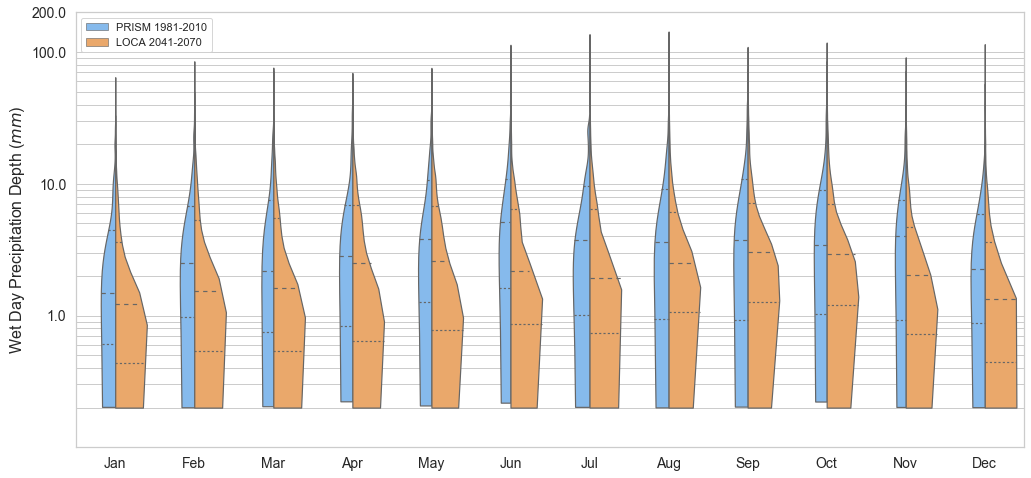

In [96]:
Fig1 = plt.figure()
Fig1.set_size_inches(17.0, 8.0)
ax11 = Fig1.add_subplot(111)
g = sns.violinplot( x="Month", y="AllDays", hue="DLabel", split=True,
                inner="quart", cut=0, linewidth=1.2,
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=P2DF, ax=ax11, legend_out=True )
g.legend(prop=dict(size=14))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=16 )
g.set_ylabel('Wet Day Precipitation Depth ($mm$)', fontsize=16)
g.set_ylim( (0.1, 200.0))
g.tick_params(axis='both', which='major', labelsize=14)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

#### Box and Whisker

In [97]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_BW_2041-2070.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_BW_2041-2070.svg'

In [98]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_BW_2041-2070.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_BW_2041-2070.png'

In [99]:
#preTicks = [ 0.0 + (x *25.0) for x in range(7) ]
preTicks = [ 1.0, 10.0, 100.0, 200.0 ]

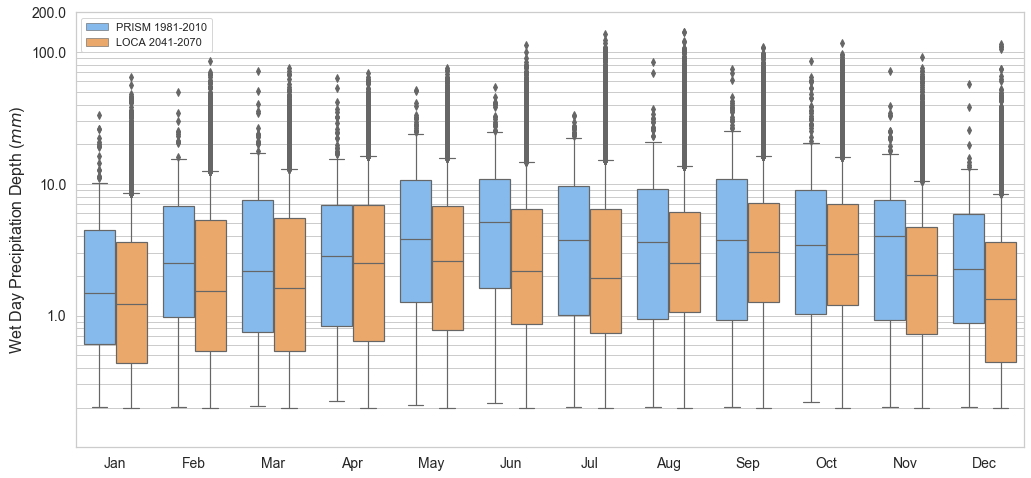

In [100]:
Fig1 = plt.figure()
Fig1.set_size_inches(17.0, 8.0)
ax11 = Fig1.add_subplot(111)
g = sns.boxplot( x="Month", y="AllDays", hue="DLabel",
                 dodge=True, linewidth=1.2, orient="v",
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=P2DF, ax=ax11 )
g.legend(prop=dict(size=14))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=16 )
g.set_ylabel('Wet Day Precipitation Depth ($mm$)', fontsize=16)
g.set_ylim( ( 0.1, 200.0))
g.tick_params(axis='both', which='major', labelsize=14)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

#### Boxen

In [101]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_BXN_2041-2070.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_BXN_2041-2070.svg'

In [102]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_BXN_2041-2070.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_BXN_2041-2070.png'

In [103]:
#preTicks = [ 0.0 + (x *25.0) for x in range(7) ]
preTicks = [ 1.0, 10.0, 100.0, 200.0 ]

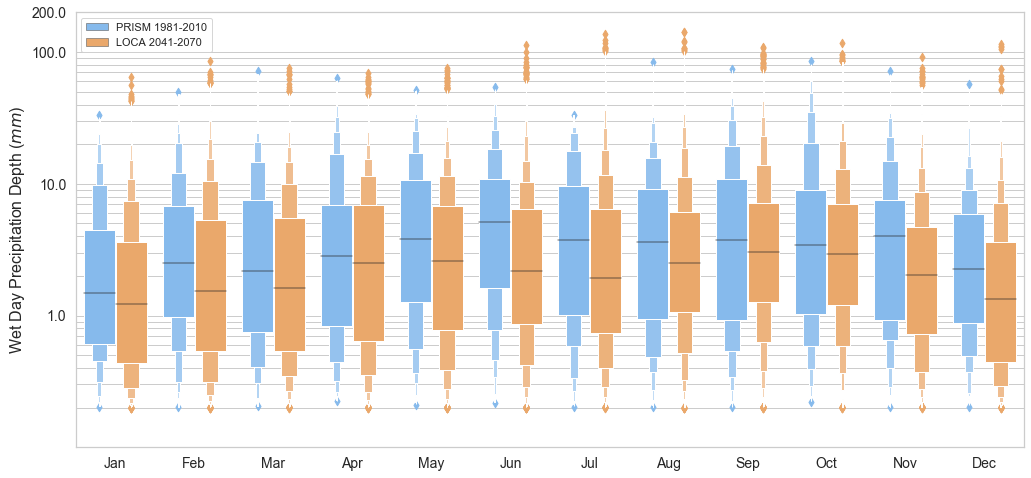

In [104]:
Fig1 = plt.figure()
Fig1.set_size_inches(17.0, 8.0)
ax11 = Fig1.add_subplot(111)
g = sns.boxenplot( x="Month", y="AllDays", hue="DLabel",
                   dodge=True, linewidth=1.2, orient="v",
                   palette={ PrismLabel : "xkcd:sky blue", 
                             LocaLabel : "xkcd:pale orange" },
                   data=P2DF, ax=ax11 )
g.legend(prop=dict(size=14))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=16 )
g.set_ylabel('Wet Day Precipitation Depth ($mm$)', fontsize=16)
g.set_ylim( ( 0.1, 200.0))
g.tick_params(axis='both', which='major', labelsize=14)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### PRISM - LOCA Projection Period 3

#### Make DataFrame for Split Violin

In [105]:
PrismLabel = "PRISM 1981-2010"
LocaLabel = "LOCA 2071-2099"

In [106]:
MonthLabels = list()
DSetLabels = list()

Go through one month at at time and build our arrays

In [107]:
for jJ in range( 1, 13, 1):
    PriAr = PriMonDict[jJ]
    NumPRISM = PriAr.shape[0]
    LocaAr = LOCA_P3[jJ]
    NumLOCA = LocaAr.shape[0]
    PRISM_Labels = [ PrismLabel for x in range( NumPRISM ) ]
    LOCA_Labels = [ LocaLabel for x in range( NumLOCA ) ]
    AllLabels = deepcopy( PRISM_Labels )
    AllLabels.extend( LOCA_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumPRISM + NumLOCA ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ PriAr, LocaAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, PriAr, LocaAr ], axis=0 )
    # end if

In [108]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "AllDays" : AllValues, }
P3DF = pd.DataFrame( data=DataDict )

In [109]:
display( HTML( P3DF.head().to_html() ) )

,DLabel,Month,AllDays
0,PRISM 1981-2010,Jan,0.578576
1,PRISM 1981-2010,Jan,2.802669
2,PRISM 1981-2010,Jan,0.245620
3,PRISM 1981-2010,Jan,1.988237
4,PRISM 1981-2010,Jan,4.407552


In [110]:
display( HTML( P3DF.describe().to_html() ) )

,AllDays
count,179853.000000
mean,5.060805
std,7.802168
min,0.200012
25%,0.757025
50%,2.200013
75%,6.137192
max,157.314180


Output to a pickle file in case need to revist

In [111]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_WetDayDepth_2071-2100.pickle" ) )
P3DF.to_pickle( OutFiler, compression='zip', protocol=-1 )

#### Plot

In [112]:
#preTicks = [ 0.0 + (x *25.0) for x in range(7) ]
preTicks = [ 1.0, 10.0, 100.0, 200.0 ]

In [113]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_2071-2100.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_2071-2100.svg'

In [114]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_2071-2100.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_2071-2100.png'

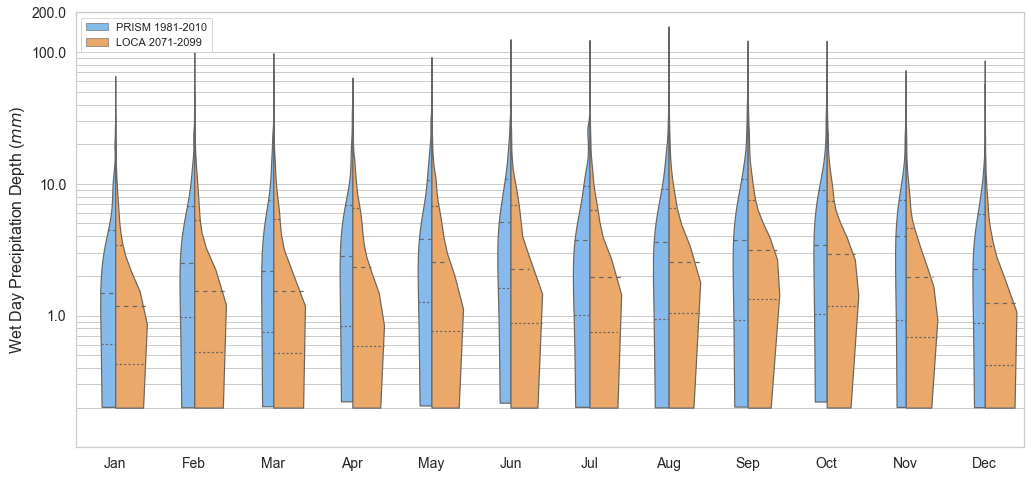

In [115]:
Fig1 = plt.figure()
Fig1.set_size_inches(17.0, 8.0)
ax11 = Fig1.add_subplot(111)
g = sns.violinplot( x="Month", y="AllDays", hue="DLabel", split=True,
                inner="quart", cut=0, linewidth=1.2,
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=P3DF, ax=ax11, legend_out=True )
g.legend(prop=dict(size=14))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=16 )
g.set_ylabel('Wet Day Precipitation Depth ($mm$)', fontsize=16)
g.set_ylim( (0.1, 200.0))
g.tick_params(axis='both', which='major', labelsize=14)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

#### Box and Whisker

In [116]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_BW_2071-2100.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_BW_2071-2100.svg'

In [117]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_BW_2071-2100.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_BW_2071-2100.png'

In [118]:
#preTicks = [ 0.0 + (x *25.0) for x in range(7) ]
preTicks = [ 1.0, 10.0, 100.0, 200.0 ]

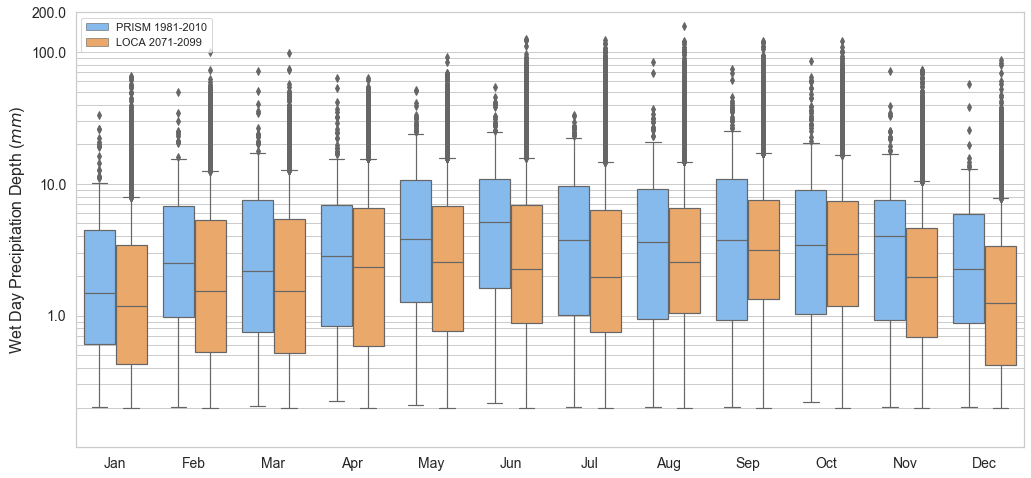

In [119]:
Fig1 = plt.figure()
Fig1.set_size_inches(17.0, 8.0)
ax11 = Fig1.add_subplot(111)
g = sns.boxplot( x="Month", y="AllDays", hue="DLabel",
                 dodge=True, linewidth=1.2, orient="v",
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=P3DF, ax=ax11 )
g.legend(prop=dict(size=14))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=16 )
g.set_ylabel('Wet Day Precipitation Depth ($mm$)', fontsize=16)
g.set_ylim( ( 0.1, 200.0))
g.tick_params(axis='both', which='major', labelsize=14)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

#### Boxen

In [120]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_BXN_2071-2100.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_BXN_2071-2100.svg'

In [121]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_Comp_BXN_2071-2100.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_Comp_BXN_2071-2100.png'

In [122]:
#preTicks = [ 0.0 + (x *25.0) for x in range(7) ]
preTicks = [ 1.0, 10.0, 100.0, 200.0 ]

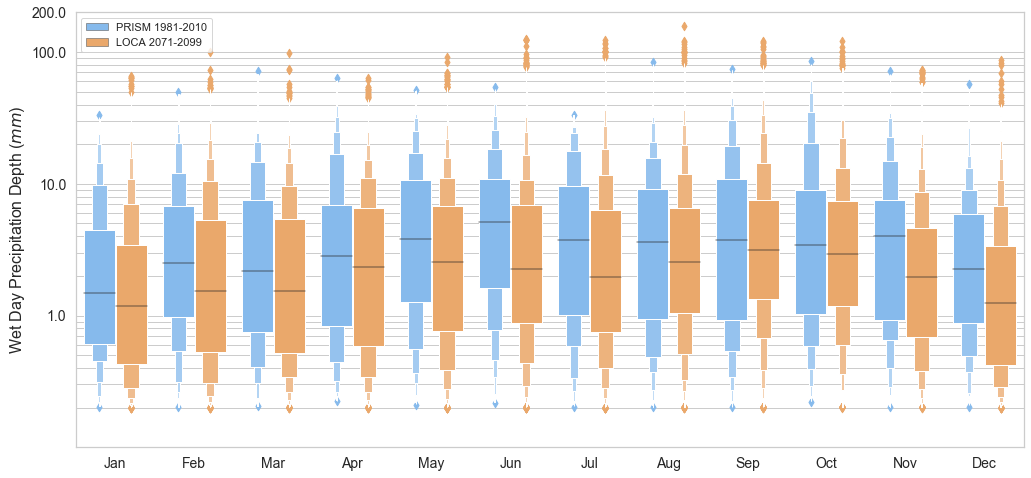

In [123]:
Fig1 = plt.figure()
Fig1.set_size_inches(17.0, 8.0)
ax11 = Fig1.add_subplot(111)
g = sns.boxenplot( x="Month", y="AllDays", hue="DLabel",
                   dodge=True, linewidth=1.2, orient="v",
                   palette={ PrismLabel : "xkcd:sky blue", 
                             LocaLabel : "xkcd:pale orange" },
                   data=P3DF, ax=ax11 )
g.legend(prop=dict(size=14))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=16 )
g.set_ylabel('Wet Day Precipitation Depth ($mm$)', fontsize=16)
g.set_ylim( ( 0.1, 200.0))
g.tick_params(axis='both', which='major', labelsize=14)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

## Final Plot

Skip all the preceeding and load our dataframes from pickles. Then make a four panel plot

In [5]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_WetDayDepth_1981-2010.pickle" ) )
DPDF = pd.read_pickle( InFiler, compression='zip' )

In [6]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_WetDayDepth_2011-2040.pickle" ) )
P1DF = pd.read_pickle( InFiler, compression='zip' )

In [7]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_WetDayDepth_2041-2070.pickle" ) )
P2DF = pd.read_pickle( InFiler, compression='zip' )

In [8]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_WetDayDepth_2071-2100.pickle" ) )
P3DF = pd.read_pickle( InFiler, compression='zip' )

In [9]:
PrismLabel1 = "PRISM 1981-2010"
LocaLabel1 = "LOCA 1981-2010"
PrismLabel2 = "PRISM 1981-2010"
LocaLabel2 = "LOCA 2011-2040"
PrismLabel3 = "PRISM 1981-2010"
LocaLabel3 = "LOCA 2041-2070"
PrismLabel4 = "PRISM 1981-2010"
LocaLabel4 = "LOCA 2071-2099"

In [10]:
preTicks = [ 0.2, 1.0, 10.0, 100.0, 200.0, 300.0 ]

In [11]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_All_BW.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_All_BW.svg'

In [12]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_All_BW.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_All_BW.png'

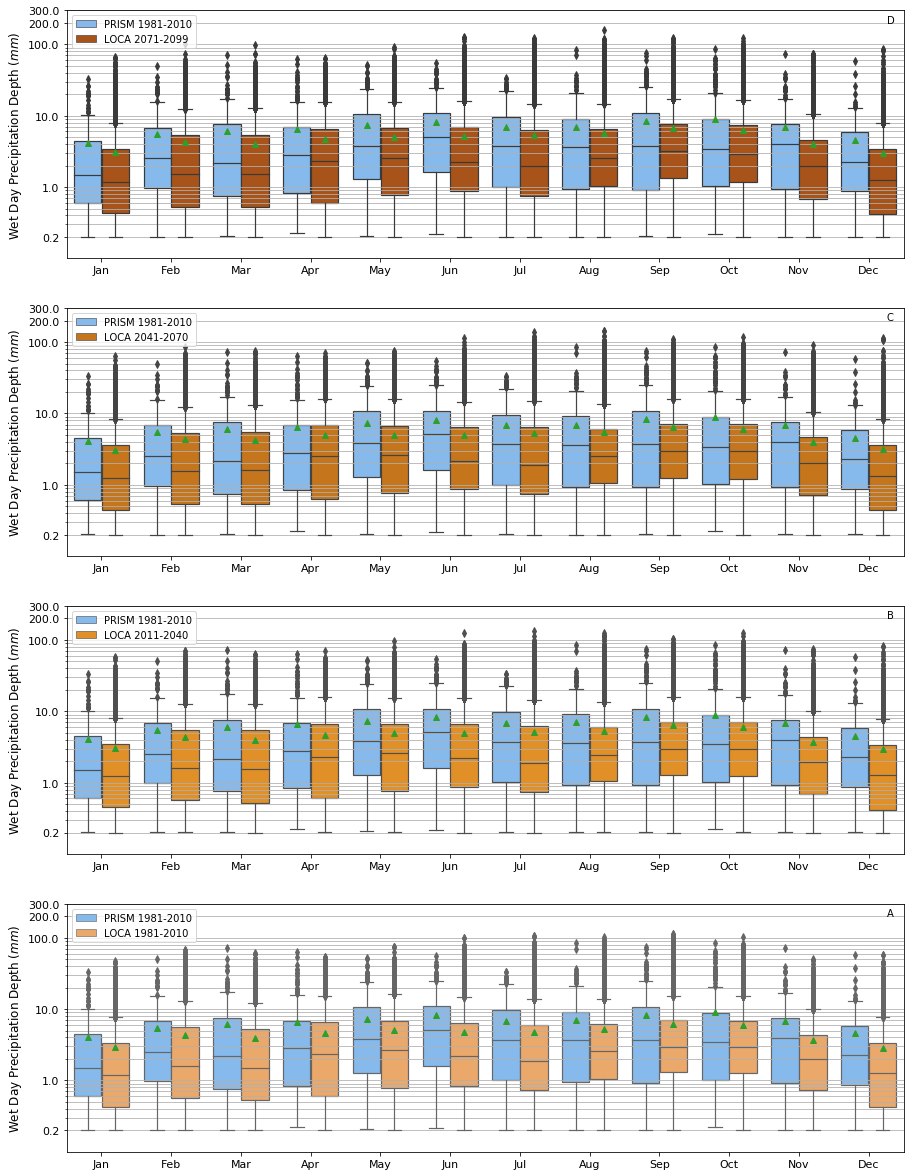

In [13]:
Fig1 = plt.figure()
Fig1.set_size_inches(15, 21)
ax11 = Fig1.add_subplot(4,1,1)
g1 = sns.boxplot( x="Month", y="AllDays", hue="DLabel",
                 dodge=True, linewidth=1.2, orient="v", showmeans=True,
                palette={ PrismLabel4 : "xkcd:sky blue", 
                          LocaLabel4 : "xkcd:burnt orange" },
                data=P3DF, ax=ax11 )
g1.legend(prop=dict(size=11))
g1.legend(loc="upper left")
g1.set_yscale('log')
g1.grid(b=True, which="both", axis='y')
g1.set_yticks( preTicks )
g1.set_xlabel('', fontsize=12 )
g1.set_ylabel('Wet Day Precipitation Depth ($mm$)', fontsize=12)
g1.set_ylim( ( 0.1, 300.0))
g1.tick_params(axis='both', which='major', labelsize=11)
g1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
g1.annotate("D", xy=(0.98,0.95), xycoords="axes fraction")
ax21 = Fig1.add_subplot(4,1,2)
g2 = sns.boxplot( x="Month", y="AllDays", hue="DLabel",
                 dodge=True, linewidth=1.2, orient="v", showmeans=True,
                palette={ PrismLabel3 : "xkcd:sky blue", 
                          LocaLabel3 : "xkcd:pumpkin" },
                data=P2DF, ax=ax21 )
g2.legend(prop=dict(size=11))
g2.legend(loc="upper left")
g2.set_yscale('log')
g2.grid(b=True, which="both", axis='y')
g2.set_yticks( preTicks )
g2.set_xlabel('', fontsize=12 )
g2.set_ylabel('Wet Day Precipitation Depth ($mm$)', fontsize=12)
g2.set_ylim( ( 0.1, 300.0))
g2.tick_params(axis='both', which='major', labelsize=11)
g2.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
g2.annotate("C", xy=(0.98,0.95), xycoords="axes fraction")
ax31 = Fig1.add_subplot(4,1,3)
g3 = sns.boxplot( x="Month", y="AllDays", hue="DLabel",
                 dodge=True, linewidth=1.2, orient="v", showmeans=True,
                palette={ PrismLabel2 : "xkcd:sky blue", 
                          LocaLabel2 : "xkcd:tangerine" },
                data=P1DF, ax=ax31 )
g3.legend(prop=dict(size=11))
g3.legend(loc="upper left")
g3.set_yscale('log')
g3.grid(b=True, which="both", axis='y')
g3.set_yticks( preTicks )
g3.set_xlabel('', fontsize=12 )
g3.set_ylabel('Wet Day Precipitation Depth ($mm$)', fontsize=12)
g3.set_ylim( ( 0.1, 300.0))
g3.tick_params(axis='both', which='major', labelsize=11)
g3.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
g3.annotate("B", xy=(0.98,0.95), xycoords="axes fraction")
ax41 = Fig1.add_subplot(4,1,4)
g4 = sns.boxplot( x="Month", y="AllDays", hue="DLabel",
                 dodge=True, linewidth=1.2, orient="v", showmeans=True,
                palette={ PrismLabel1 : "xkcd:sky blue", 
                          LocaLabel1 : "xkcd:pale orange" },
                data=DPDF, ax=ax41 )
g4.legend(prop=dict(size=11))
g4.legend(loc="upper left")
g4.set_yscale('log')
g4.grid(b=True, which="both", axis='y')
g4.set_yticks( preTicks )
g4.set_xlabel('', fontsize=12 )
g4.set_ylabel('Wet Day Precipitation Depth ($mm$)', fontsize=12)
g4.set_ylim( ( 0.1, 300.0))
g4.tick_params(axis='both', which='major', labelsize=11)
g4.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
g4.annotate("A", xy=(0.98,0.95), xycoords="axes fraction")
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [14]:
nP1DF = P1DF[P1DF["DLabel"] == 'LOCA 2011-2040'].copy()
nP1DF["DLabel"].unique()

array(['LOCA 2011-2040'], dtype=object)

In [15]:
nP2DF = P2DF[P2DF["DLabel"] == 'LOCA 2041-2070'].copy()
nP3DF = P3DF[P3DF["DLabel"] == 'LOCA 2071-2099'].copy()
len( nP2DF ), len( nP3DF )

(189343, 177554)

In [16]:
All1 = pd.concat( [ DPDF, nP1DF, nP2DF, nP3DF ], ignore_index=True )

In [17]:
All1["DLabel"].unique()

array(['PRISM 1981-2010', 'LOCA 1981-2010', 'LOCA 2011-2040',
       'LOCA 2041-2070', 'LOCA 2071-2099'], dtype=object)

In [18]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_All1ax_BW.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_All1ax_BW.svg'

In [19]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_All1ax_BW.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_All1ax_BW.png'

In [20]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_WetDayDepth_All1ax_BW.pdf") )
OutPDF

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_WetDayDepth_All1ax_BW.pdf'

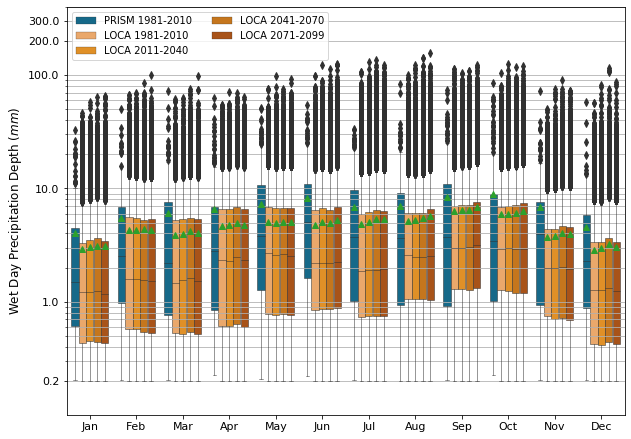

In [21]:
Fig1 = plt.figure()
Fig1.set_size_inches(10, 7.5)
ax11 = Fig1.add_subplot()
g1 = sns.boxplot( x="Month", y="AllDays", hue="DLabel",
                   dodge=True, linewidth=0.5, orient="v", showmeans=True,
                   palette={ PrismLabel1 : "xkcd:ocean blue",
                             LocaLabel1 : "xkcd:pale orange",
                             LocaLabel2 : "xkcd:tangerine",
                             LocaLabel3 : "xkcd:pumpkin",
                             LocaLabel4 : "xkcd:burnt orange" },
                   data=All1, ax=ax11 )
g1.legend(prop=dict(size=11))
g1.legend(loc="upper left", ncol=2)
g1.set_yscale('log')
g1.grid(b=True, which="both", axis='y')
g1.set_yticks( preTicks )
g1.set_xlabel('', fontsize=12 )
g1.set_ylabel('Wet Day Precipitation Depth ($mm$)', fontsize=12)
g1.set_ylim( ( 0.1, 400.0))
g1.tick_params(axis='both', which='major', labelsize=11)
g1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )